# Gaussian Naive Bayes Classifier for Breast Cancer Dataset
- Implement a simple program using GaussianNB() to classify the data samples (including train and test data samples). Report the prediction accuracy and confusion matrix of the classifier.
- Add (30-dimensional) zero-mean Gaussian noises with different variances (at least 5, e.g., 50, 100, 200, 400, 800) to the features of the dataset; train Gaussian Naïve Bayes classifiers to classify the noisy datasets and report the prediction accuracies and confusion matrices of the classifiers.

In [1]:
# import libraries
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn import preprocessing
from sklearn import metrics
import os
import math

In [2]:
# connect to Kaggle open-source database
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/breast-cancer-wisconsin-data/data.csv


# 1. Data Processing 

In [3]:
# import dataset
df = pd.read_csv("/kaggle/input/breast-cancer-wisconsin-data/data.csv")
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [4]:
# check datatype
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

**Note**: we will drop *id* and *Unnamed* columns as they does not contribute to the learning process of the model.

## 1.1. Data Visualization
Let's plot the malignent and benign cancer data points.

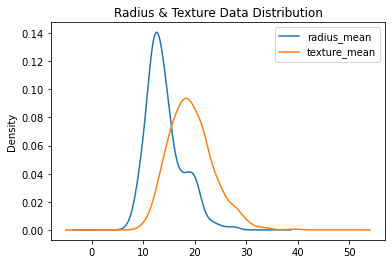

In [5]:
# plot the distribution of points
plt.title("Radius & Texture Data Distribution")
df['radius_mean'].plot(kind='kde')
df['texture_mean'].plot(kind='kde')
plt.legend()
plt.show()

## 1.2. Data Processing

In [6]:
# drop columns
df = df.drop(['id'], axis=1)
df = df.drop(['Unnamed: 32'], axis=1)

In [7]:
# Examine and replace missing values 
print(df.isnull().values.any())

False


**Note**: split the dataset into input features and labels.

In [8]:
# convert character into numerical value for easily calculate the 
df['diagnosis'] = [1 if i == 'M' else 0 for i in df['diagnosis']]

In [9]:
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [10]:
# split the dataset into input features and target label
X = df.drop(["diagnosis"], axis=1)
y = df['diagnosis'].to_numpy().reshape(-1, 1)

In [11]:
# check shapes
print(X.shape)
print(y.shape)

(569, 30)
(569, 1)


In [12]:
# data normalization
X_scaler = preprocessing.MinMaxScaler(feature_range=(-1,1))
X = X_scaler.fit_transform(X)

y_scaler = preprocessing.MinMaxScaler(feature_range=(-1,1))
y = y_scaler.fit_transform(y)

In [13]:
# partition into training/test/validation 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# 2. Gaussian Naive Bayes On Original Dataset

## 2.1. Create Model

In [14]:
# create model
gnb1 = GaussianNB()

## 2.2. Train Model

In [15]:
# train model on training dataset
gnb1.fit(X_train, y_train)

/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB()

 as there are many features, I only choose the radius and texture mean column so that we can, later on, ## 2.3. Test Model

In [16]:
# predict on validate set
y_test_pred = gnb1.predict(X_test)

# predict on train set
y_train_pred = gnb1.predict(X_train)

accuracy = metrics.accuracy_score(y_test, y_test_pred)
f1 = metrics.f1_score(y_test, y_test_pred)
prec = metrics.precision_score(y_test, y_test_pred)
recall = metrics.recall_score(y_test, y_test_pred)
roc_auc = metrics.roc_auc_score(y_test, y_test_pred)
cm = metrics.confusion_matrix(y_test.squeeze(), y_test_pred.squeeze())
tn, fp, fn, tp = metrics.confusion_matrix(y_test.squeeze(), y_test_pred.squeeze()).ravel()

print("Training MSE = %f" % metrics.mean_squared_error(y_train, y_train_pred))
print("Validating MSE = %f" % metrics.mean_squared_error(y_test, y_test_pred))
print('F1 Score = %f' % (f1))
print('Precision Score = %f' % (prec))
print('Recall Score = %f' % (recall))
print('ROC-AUC Score = %f' % (roc_auc))
print('\n-----------------------------')
print('SUBMIT')
print('-----------------------------')
print('Accuracy = %f' % (accuracy))
print(f'Confusion Matrix = \n{cm}')
print(f'True Negative: {tn}')
print(f'False Positive: {fp}')
print(f'False Negative: {fn}')
print(f'True Positive: {tp}')

Training MSE = 0.231156
Validating MSE = 0.350877
F1 Score = 0.883721
Precision Score = 0.863636
Recall Score = 0.904762
ROC-AUC Score = 0.910714

-----------------------------
SUBMIT
-----------------------------
Accuracy = 0.912281
Confusion Matrix = 
[[99  9]
 [ 6 57]]
True Negative: 99
False Positive: 9
False Negative: 6
True Positive: 57


# 3. Gaussian Naive Bayes On Noisy Dataset

## 3.1. Data Processing

In [17]:
# re-import dataset
df = pd.read_csv("/kaggle/input/breast-cancer-wisconsin-data/data.csv")
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [18]:
# drop columns
df = df.drop(['id'], axis=1)
df = df.drop(['Unnamed: 32'], axis=1)

In [19]:
# convert character into numerical value for easily calculate the 
df['diagnosis'] = [1 if i == 'M' else 0 for i in df['diagnosis']]

In [20]:
# split the dataset into input features and target label
X = df.drop(["diagnosis"], axis=1)
y = df['diagnosis'].to_numpy().reshape(-1, 1)

In [21]:
# check shapes
print(X.shape)
print(y.shape)

(569, 30)
(569, 1)


In [22]:
X.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [23]:
# create noisy Gaussian-distributed noisy data with same matrix size
# Reference: https://stackoverflow.com/questions/46093073/adding-gaussian-noise-to-a-dataset-of-floating-points-and-save-it-python

# zero-mean noise with variance 50
noise_1 = np.random.normal(loc=0, scale=math.sqrt(50), size=[569, 30]) 
noise_1_scaler = preprocessing.MinMaxScaler(feature_range=(-1,1))
noise_1 = noise_1_scaler.fit_transform(noise_1)

# zero-mean noise with variance 100
noise_2 = np.random.normal(loc=0, scale=math.sqrt(100), size=[569, 30]) 
noise_2_scaler = preprocessing.MinMaxScaler(feature_range=(-1,1))
noise_2 = noise_2_scaler.fit_transform(noise_2)

# zero-mean noise with variance 200
noise_3 = np.random.normal(loc=0, scale=math.sqrt(200), size=[569, 30]) 
noise_3_scaler = preprocessing.MinMaxScaler(feature_range=(-1,1))
noise_3 = noise_3_scaler.fit_transform(noise_3)

# zero-mean noise with variance 400
noise_4 = np.random.normal(loc=0, scale=math.sqrt(400), size=[569, 30]) 
noise_4_scaler = preprocessing.MinMaxScaler(feature_range=(-1,1))
noise_4 = noise_4_scaler.fit_transform(noise_4)

# zero-mean noise with variance 800
noise_5 = np.random.normal(loc=0, scale=math.sqrt(800), size=[569, 30]) 
noise_5_scaler = preprocessing.MinMaxScaler(feature_range=(-1,1))
noise_5 = noise_5_scaler.fit_transform(noise_5)

In [24]:
# data normalization
X_scaler = preprocessing.MinMaxScaler(feature_range=(-1,1))
X = X_scaler.fit_transform(X)

y_scaler = preprocessing.MinMaxScaler(feature_range=(-1,1))
y = y_scaler.fit_transform(y)

In [25]:
# partition into training/test/validation 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [26]:
X_train.shape

(398, 30)

## 3.2. Case 1: Add Noise 1 To The Dataset

### 3.2.1. Data Processing

In [27]:
# add noise to dataset
X1 = X + noise_1

In [28]:
# view dataset
pd.DataFrame(X1).head()

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,0.092268,-0.387008,-0.388126,0.200334,0.889746,0.721315,0.177319,0.047406,0.086303,0.129927,...,0.160448,-0.428721,0.287355,0.161911,0.557695,0.100491,0.249206,1.177409,0.260132,-0.283442
1,0.124794,0.545147,0.333725,0.252111,-0.880388,-0.492170,-0.230904,-0.119842,0.240545,-0.834362,...,-0.157721,-0.599238,0.577666,-0.273524,-0.655607,-0.799242,-0.177550,0.129118,-0.426278,-0.704676
2,-0.488865,0.374828,0.793944,-0.457088,0.006043,0.032636,-0.240325,-0.174214,-0.338765,-1.103815,...,0.642022,-0.152279,-0.103957,0.108064,0.320612,0.039020,-0.462399,0.636254,-0.586989,-0.503445
3,-0.898461,-0.191510,-1.001278,-0.519326,-0.176317,0.792493,0.408051,0.415181,0.419156,0.711138,...,-0.128511,-0.089008,-0.272765,-0.883666,0.346349,0.645647,-0.184911,1.071769,0.576262,1.181841
4,0.128581,-0.200808,0.218613,0.289980,0.237888,-0.495931,-0.016650,-0.337428,-0.476768,-0.438019,...,0.098734,-1.285609,0.279777,-0.803539,-0.088847,-0.399041,-1.202979,-0.502318,-0.651843,-0.956511


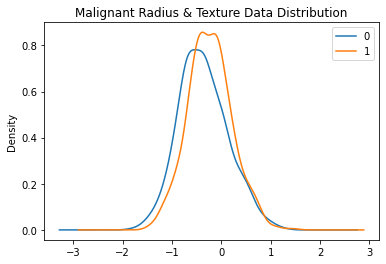

In [29]:
# plot the distribution of points
plt.title("Malignant Radius & Texture Data Distribution")
pd.DataFrame(X1)[0].plot(kind='kde')
pd.DataFrame(X1)[1].plot(kind='kde')
plt.legend()
plt.show()

In [30]:
# partition into training/test/validation 
X_train, X_test, y_train, y_test = train_test_split(X1, y, test_size=0.3, random_state=0)

### 3.2.2. Create Model

In [31]:
# create model
gnb2_1 = GaussianNB()

### 3.2.3. Train Model

In [32]:
# train model on training dataset
gnb2_1.fit(X_train, y_train)

/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB()

### 3.2.4. Test Model

In [33]:
# predict on validate set
y_test_pred = gnb2_1.predict(X_test)

# predict on train set
y_train_pred = gnb2_1.predict(X_train)

accuracy = metrics.accuracy_score(y_test, y_test_pred)
f1 = metrics.f1_score(y_test, y_test_pred)
prec = metrics.precision_score(y_test, y_test_pred)
recall = metrics.recall_score(y_test, y_test_pred)
roc_auc = metrics.roc_auc_score(y_test, y_test_pred)
cm = metrics.confusion_matrix(y_test.squeeze(), y_test_pred.squeeze())
tn, fp, fn, tp = metrics.confusion_matrix(y_test.squeeze(), y_test_pred.squeeze()).ravel()

print("Training MSE = %f" % metrics.mean_squared_error(y_train, y_train_pred))
print("Validating MSE = %f" % metrics.mean_squared_error(y_test, y_test_pred))
print('F1 Score = %f' % (f1))
print('Precision Score = %f' % (prec))
print('Recall Score = %f' % (recall))
print('ROC-AUC Score = %f' % (roc_auc))
print('\n-----------------------------')
print('SUBMIT')
print('-----------------------------')
print('Accuracy = %f' % (accuracy))
print(f'Confusion Matrix = \n{cm}')
print(f'True Negative: {tn}')
print(f'False Positive: {fp}')
print(f'False Negative: {fn}')
print(f'True Positive: {tp}')

Training MSE = 0.281407
Validating MSE = 0.304094
F1 Score = 0.892562
Precision Score = 0.931034
Recall Score = 0.857143
ROC-AUC Score = 0.910053

-----------------------------
SUBMIT
-----------------------------
Accuracy = 0.923977
Confusion Matrix = 
[[104   4]
 [  9  54]]
True Negative: 104
False Positive: 4
False Negative: 9
True Positive: 54


## 3.3. Case 2: Add Noise 2 To The Dataset

### 3.3.1. Data Processing

In [34]:
# add noise to dataset
X2 = X + noise_2

In [35]:
# view dataset
pd.DataFrame(X2).head()

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,-0.120680,-0.644651,-0.431895,-0.295147,0.513861,0.312111,0.485243,-0.063337,0.170880,0.272806,...,0.695933,-0.443066,1.336620,0.171026,-0.092555,0.451483,0.563962,0.144204,0.739033,-0.228256
1,0.240607,-0.357692,-0.000465,0.045950,-0.206844,-0.925881,-0.550929,0.166261,0.097188,-0.096262,...,0.055976,-0.988575,0.035520,0.328414,-0.161327,-0.458614,-0.889343,0.155288,-0.394197,-0.215801
2,-0.123494,0.175348,0.934768,-0.281603,0.321360,-0.174251,0.250192,-0.161103,-0.049210,-0.139663,...,0.468047,0.194663,0.405701,0.013931,-0.194019,-0.527389,-0.171099,0.905462,-0.199827,-0.702312
3,-1.451123,-0.349139,-0.625694,-0.395265,1.020515,1.175081,0.291231,-0.237293,0.531883,1.598263,...,-0.198484,-0.043305,-0.671579,-0.125309,0.869390,0.353853,-0.310989,0.279458,1.025908,0.176667
4,-0.290106,-0.629085,-0.208664,-0.128040,-0.654537,0.633792,0.409584,0.174323,0.026589,-0.960023,...,0.124137,-0.679474,0.005364,-0.043346,0.323455,-1.088158,-0.501972,0.078374,-0.839150,-0.817943


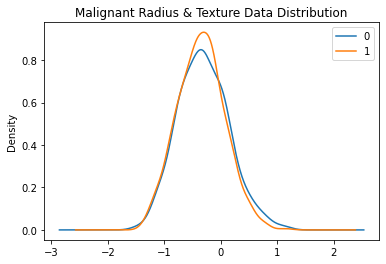

In [36]:
# plot the distribution of points
plt.title("Malignant Radius & Texture Data Distribution")
pd.DataFrame(X2)[0].plot(kind='kde')
pd.DataFrame(X2)[1].plot(kind='kde')
plt.legend()
plt.show()

In [37]:
# partition into training/test/validation 
X_train, X_test, y_train, y_test = train_test_split(X2, y, test_size=0.3, random_state=0)

### 3.3.2. Create Model

In [38]:
# create model
gnb2_2 = GaussianNB()

### 3.3.3. Train Model

In [39]:
# train model on training dataset
gnb2_2.fit(X_train, y_train)

/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB()

### 3.3.4. Test Model

In [40]:
# predict on validate set
y_test_pred = gnb2_2.predict(X_test)

# predict on train set
y_train_pred = gnb2_2.predict(X_train)

accuracy = metrics.accuracy_score(y_test, y_test_pred)
f1 = metrics.f1_score(y_test, y_test_pred)
prec = metrics.precision_score(y_test, y_test_pred)
recall = metrics.recall_score(y_test, y_test_pred)
roc_auc = metrics.roc_auc_score(y_test, y_test_pred)
cm = metrics.confusion_matrix(y_test.squeeze(), y_test_pred.squeeze())
tn, fp, fn, tp = metrics.confusion_matrix(y_test.squeeze(), y_test_pred.squeeze()).ravel()

print("Training MSE = %f" % metrics.mean_squared_error(y_train, y_train_pred))
print("Validating MSE = %f" % metrics.mean_squared_error(y_test, y_test_pred))
print('F1 Score = %f' % (f1))
print('Precision Score = %f' % (prec))
print('Recall Score = %f' % (recall))
print('ROC-AUC Score = %f' % (roc_auc))
print('\n-----------------------------')
print('SUBMIT')
print('-----------------------------')
print('Accuracy = %f' % (accuracy))
print(f'Confusion Matrix = \n{cm}')
print(f'True Negative: {tn}')
print(f'False Positive: {fp}')
print(f'False Negative: {fn}')
print(f'True Positive: {tp}')

Training MSE = 0.311558
Validating MSE = 0.444444
F1 Score = 0.848000
Precision Score = 0.854839
Recall Score = 0.841270
ROC-AUC Score = 0.878968

-----------------------------
SUBMIT
-----------------------------
Accuracy = 0.888889
Confusion Matrix = 
[[99  9]
 [10 53]]
True Negative: 99
False Positive: 9
False Negative: 10
True Positive: 53


## 3.4. Case 3: Add Noise 3 To The Dataset

### 3.4.1. Data Processing

In [41]:
# add noise to dataset
X3 = X + noise_3

In [42]:
# view dataset
pd.DataFrame(X3).head()

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,0.386096,-1.118299,0.074249,-0.335559,-0.111752,0.862490,0.152953,0.518300,0.088125,0.532596,...,0.268072,-1.247546,0.528502,0.504777,0.904764,0.126300,0.411379,0.969029,-0.315399,-0.380826
1,0.418034,-0.180781,-0.152629,0.459406,-0.531690,-0.356489,-0.514490,-0.289722,-0.231689,-0.469763,...,0.012374,-0.847304,-0.402200,-0.468878,0.229620,-0.269779,-0.447236,-0.170202,-0.426296,-0.628236
2,-0.358800,-0.074746,0.438618,-0.413113,-0.002456,0.380964,0.639372,0.360686,0.261657,-0.436521,...,-0.032722,-0.300281,0.156286,-0.276489,0.105800,-0.055576,-0.182703,0.675371,-0.258918,-0.574255
3,-0.934728,-0.557949,-0.465712,-0.413552,1.064075,0.309149,0.231393,-0.063055,0.880862,0.950218,...,-1.180123,-0.196871,0.353184,-0.883232,0.458895,0.705264,0.236246,1.631232,0.748666,0.834852
4,0.114469,-0.442448,0.314727,-0.083092,-0.666278,-0.355820,0.135863,0.375005,0.101067,-0.903518,...,-0.027711,-0.942946,0.758541,-0.724266,0.656383,-0.599609,0.202546,0.634599,-0.828199,-0.837304


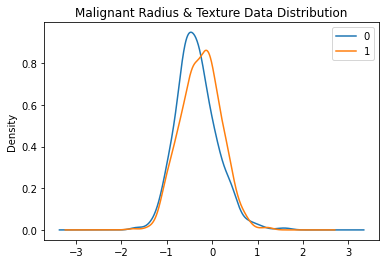

In [43]:
# plot the distribution of points
plt.title("Malignant Radius & Texture Data Distribution")
pd.DataFrame(X3)[0].plot(kind='kde')
pd.DataFrame(X3)[1].plot(kind='kde')
plt.legend()
plt.show()

In [44]:
# partition into training/test/validation 
X_train, X_test, y_train, y_test = train_test_split(X3, y, test_size=0.3, random_state=0)

### 3.4.2. Create Model

In [45]:
# create model
gnb2_3 = GaussianNB()

### 3.4.3. Train Model

In [46]:
# train model on training dataset
gnb2_3.fit(X_train, y_train)

/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB()

### 3.4.4. Test Model

In [47]:
# predict on validate set
y_test_pred = gnb2_3.predict(X_test)

# predict on train set
y_train_pred = gnb2_3.predict(X_train)

accuracy = metrics.accuracy_score(y_test, y_test_pred)
f1 = metrics.f1_score(y_test, y_test_pred)
prec = metrics.precision_score(y_test, y_test_pred)
recall = metrics.recall_score(y_test, y_test_pred)
roc_auc = metrics.roc_auc_score(y_test, y_test_pred)
cm = metrics.confusion_matrix(y_test.squeeze(), y_test_pred.squeeze())
tn, fp, fn, tp = metrics.confusion_matrix(y_test.squeeze(), y_test_pred.squeeze()).ravel()

print("Training MSE = %f" % metrics.mean_squared_error(y_train, y_train_pred))
print("Validating MSE = %f" % metrics.mean_squared_error(y_test, y_test_pred))
print('F1 Score = %f' % (f1))
print('Precision Score = %f' % (prec))
print('Recall Score = %f' % (recall))
print('ROC-AUC Score = %f' % (roc_auc))
print('\n-----------------------------')
print('SUBMIT')
print('-----------------------------')
print('Accuracy = %f' % (accuracy))
print(f'Confusion Matrix = \n{cm}')
print(f'True Negative: {tn}')
print(f'False Positive: {fp}')
print(f'False Negative: {fn}')
print(f'True Positive: {tp}')

Training MSE = 0.321608
Validating MSE = 0.233918
F1 Score = 0.918033
Precision Score = 0.949153
Recall Score = 0.888889
ROC-AUC Score = 0.930556

-----------------------------
SUBMIT
-----------------------------
Accuracy = 0.941520
Confusion Matrix = 
[[105   3]
 [  7  56]]
True Negative: 105
False Positive: 3
False Negative: 7
True Positive: 56


## 3.5. Case 4: Add Noise 4 To The Dataset

### 3.5.1. Data Processing

In [48]:
# add noise to dataset
X4 = X + noise_4

In [49]:
# view dataset
pd.DataFrame(X4).head()

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,0.060920,-1.287760,0.137647,0.040780,0.171636,0.237196,0.631073,0.637718,0.822674,0.413792,...,0.911631,0.115052,0.173442,0.037475,-0.076358,0.446958,0.376605,1.339345,0.206734,-0.205118
1,0.668285,-0.351203,-0.351617,0.070743,-0.466392,-0.369395,-1.243956,0.006205,-0.401310,-1.331687,...,0.004564,-0.732911,0.365879,-0.538233,-0.357808,-0.740701,-0.352677,0.233507,-0.311868,-0.601864
2,0.042091,-0.162156,0.687646,-0.214686,0.797766,0.440974,-0.115799,0.453164,0.285905,-0.689070,...,-0.057810,-0.389520,-0.049717,-0.621118,0.506202,-0.298817,-0.075413,0.273158,0.140370,-0.779624
3,-0.614004,-0.808308,-0.320885,-0.245649,0.409637,0.207148,-0.224572,-0.273073,0.701980,0.773324,...,-0.160114,-0.135665,-0.013072,-0.459890,0.279733,1.284044,-0.382014,-0.045728,1.139291,-0.082038
4,-0.290186,-0.835768,0.331695,-0.182700,0.019355,0.020721,-0.421246,0.263520,-0.614140,-0.805628,...,0.230889,-1.290828,0.122599,-0.047901,0.230597,-0.542548,-0.164890,0.321222,-0.068495,-1.491757


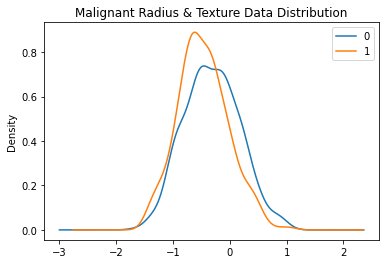

In [50]:
# plot the distribution of points
plt.title("Malignant Radius & Texture Data Distribution")
pd.DataFrame(X4)[0].plot(kind='kde')
pd.DataFrame(X4)[1].plot(kind='kde')
plt.legend()
plt.show()

In [51]:
# partition into training/test/validation 
X_train, X_test, y_train, y_test = train_test_split(X4, y, test_size=0.3, random_state=0)

### 3.5.2. Create Model

In [52]:
# create model
gnb2_4 = GaussianNB()

### 3.5.3. Train Model

In [53]:
# train model on training dataset
gnb2_4.fit(X_train, y_train)

/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB()

### 3.5.4. Test Model

In [54]:
# predict on validate set
y_test_pred = gnb2_4.predict(X_test)

# predict on train set
y_train_pred = gnb2_4.predict(X_train)

accuracy = metrics.accuracy_score(y_test, y_test_pred)
f1 = metrics.f1_score(y_test, y_test_pred)
prec = metrics.precision_score(y_test, y_test_pred)
recall = metrics.recall_score(y_test, y_test_pred)
roc_auc = metrics.roc_auc_score(y_test, y_test_pred)
cm = metrics.confusion_matrix(y_test.squeeze(), y_test_pred.squeeze())
tn, fp, fn, tp = metrics.confusion_matrix(y_test.squeeze(), y_test_pred.squeeze()).ravel()

print("Training MSE = %f" % metrics.mean_squared_error(y_train, y_train_pred))
print("Validating MSE = %f" % metrics.mean_squared_error(y_test, y_test_pred))
print('F1 Score = %f' % (f1))
print('Precision Score = %f' % (prec))
print('Recall Score = %f' % (recall))
print('ROC-AUC Score = %f' % (roc_auc))
print('\n-----------------------------')
print('SUBMIT')
print('-----------------------------')
print('Accuracy = %f' % (accuracy))
print(f'Confusion Matrix = \n{cm}')
print(f'True Negative: {tn}')
print(f'False Positive: {fp}')
print(f'False Negative: {fn}')
print(f'True Positive: {tp}')

Training MSE = 0.311558
Validating MSE = 0.304094
F1 Score = 0.896000
Precision Score = 0.903226
Recall Score = 0.888889
ROC-AUC Score = 0.916667

-----------------------------
SUBMIT
-----------------------------
Accuracy = 0.923977
Confusion Matrix = 
[[102   6]
 [  7  56]]
True Negative: 102
False Positive: 6
False Negative: 7
True Positive: 56


## 3.6. Case 5: Add Noise 5 To The Dataset

### 3.6.1. Data Processing

In [55]:
# add noise to dataset
X5 = X + noise_5

In [56]:
# view dataset
pd.DataFrame(X5).head()

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,0.561045,-1.366778,0.149117,-0.460584,0.516644,0.739017,0.580825,0.969909,-0.109278,0.445775,...,-0.410044,-0.517819,0.490518,-0.132174,0.196766,0.076600,0.382279,0.766487,0.106361,0.160223
1,0.039056,-0.949097,-0.036647,0.248345,-0.650733,-0.381711,-0.390796,0.232561,-0.420261,-0.180946,...,0.351074,-0.426157,0.281306,-0.174553,-0.688376,-0.628905,-0.426334,0.037705,-0.592805,-0.564448
2,0.439891,-0.193321,-0.042013,-0.682961,-0.515792,-0.273489,-0.047779,0.227505,0.103181,-0.739117,...,0.250139,-0.205900,0.365459,-0.397367,0.426760,0.056897,-0.387753,0.876921,-0.407386,-0.984271
3,0.420181,-0.591635,-0.793751,-0.557561,0.600195,1.296933,0.789856,0.062715,0.366933,0.395171,...,-0.469288,-0.192444,0.029630,-0.689626,0.335945,0.118048,0.318717,0.827570,1.486477,0.396995
4,0.225917,-0.601183,-0.216950,0.350702,-0.023592,-0.114985,0.092199,0.042943,-0.217477,-0.390688,...,0.201577,-0.630223,0.474875,-0.508179,0.040548,-0.791351,-0.839348,-0.401259,-0.610763,-0.936769


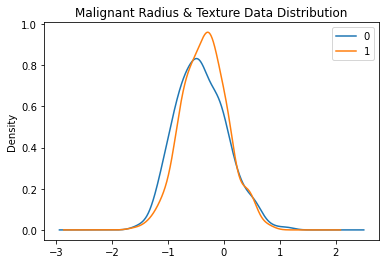

In [57]:
# plot the distribution of points
plt.title("Malignant Radius & Texture Data Distribution")
pd.DataFrame(X5)[0].plot(kind='kde')
pd.DataFrame(X5)[1].plot(kind='kde')
plt.legend()
plt.show()

In [58]:
# partition into training/test/validation 
X_train, X_test, y_train, y_test = train_test_split(X5, y, test_size=0.3, random_state=0)

### 3.6.2. Create Model

In [59]:
# create model
gnb2_5 = GaussianNB()

### 3.6.3. Train Model

In [60]:
# train model on training dataset
gnb2_5.fit(X_train, y_train)

/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB()

### 3.6.4. Test Model

In [61]:
# predict on validate set
y_test_pred = gnb2_5.predict(X_test)

# predict on train set
y_train_pred = gnb2_5.predict(X_train)

accuracy = metrics.accuracy_score(y_test, y_test_pred)
f1 = metrics.f1_score(y_test, y_test_pred)
prec = metrics.precision_score(y_test, y_test_pred)
recall = metrics.recall_score(y_test, y_test_pred)
roc_auc = metrics.roc_auc_score(y_test, y_test_pred)
cm = metrics.confusion_matrix(y_test.squeeze(), y_test_pred.squeeze())
tn, fp, fn, tp = metrics.confusion_matrix(y_test.squeeze(), y_test_pred.squeeze()).ravel()

print("Training MSE = %f" % metrics.mean_squared_error(y_train, y_train_pred))
print("Validating MSE = %f" % metrics.mean_squared_error(y_test, y_test_pred))
print('F1 Score = %f' % (f1))
print('Precision Score = %f' % (prec))
print('Recall Score = %f' % (recall))
print('ROC-AUC Score = %f' % (roc_auc))
print('\n-----------------------------')
print('SUBMIT')
print('-----------------------------')
print('Accuracy = %f' % (accuracy))
print(f'Confusion Matrix = \n{cm}')
print(f'True Negative: {tn}')
print(f'False Positive: {fp}')
print(f'False Negative: {fn}')
print(f'True Positive: {tp}')

Training MSE = 0.281407
Validating MSE = 0.514620
F1 Score = 0.819672
Precision Score = 0.847458
Recall Score = 0.793651
ROC-AUC Score = 0.855159

-----------------------------
SUBMIT
-----------------------------
Accuracy = 0.871345
Confusion Matrix = 
[[99  9]
 [13 50]]
True Negative: 99
False Positive: 9
False Negative: 13
True Positive: 50
